Actor network theory

# Chunks or MapReduce

# Particular questions for Ben:
- I'm likely going to have to bring in the data in such a way that some of the bread-and-butter EDA tactics won't work nicely.  It doesn't seem worthwhile to bring in empty posts, for instance, just to be able to report on them.  I *could* keep track of those numerically I guess, but is that worth doing? 

- any guess on if it's more efficient to simplify each entry as I read them in (lowercasing, etc) or as a full pandas dframe?  I'd assume the latter, if there's any difference at all. 


Quoted on machinelearningmastery.com:
a bag-of-bigrams representation is much more powerful than bag-of-words, and in many cases proves very hard to beat.

— Page 75, Neural Network Methods in Natural Language Processing, 2017.

"This is called the “hash trick” or “feature hashing“.

The challenge is to choose a hash space to accommodate the chosen vocabulary size to minimize the probability of collisions and trade-off sparsity."

https://machinelearningmastery.com/gentle-introduction-bag-words-model/

The TF-IDF would be a good scoring if it's computationally feasible. 


Thoughts:

I'm looking for clusterings of unique words.  For naive bayes at least, if my understanding is correct, I'll get essentially that.  Someone talking about Kropotkin, for instance, will probably be common in lefty groups and uncommon outside of them.  Reducing to just "fringe vs not" might actually be harder, as both lefty and non lefty groups will talk about him.  Similarly, anarcho-primitivists being right about literally everything will skew results.  

I think it might be harder to justify looking at a single post and identifying if it comes from a fringe forum or not, given that I'd essentially have to argue that it extends to posts made *outside* of that forum for classifying a user and that might be a stretch.  So I guess I'll have to focus on users, which may be significantly more difficult.  I can grab users from subs, then grab a corpus via a sample of their posts.  Two issues emerge:

- should I sample randomly across the entire data set or should I just take the most recent 100 or so?  Or should I grab X posts from in the sub and Y posts from outside, with the expecation I'll be "knocking out" the X-posts if things go well?

- how do I handle the length of the corpus?  # of posts or length of text?


Column thoughts:
Definitely useful for analysis: subreddit, body, author  (subreddit_id could be used instead of subreddit, is the memory
difference at all non-negligible?)

Probably needed at least for pre-processing/selection: score or controversiality?   Edited maybe, will do more EDA to see if most edited posts are wiped-out.    Same thing essentially with stickied, if it's mod-business then it can probably be dropped.  

Deleted bodies of course should be dropped.  


For computational purposes, I think I'll have to drop capitalization.  It would be nice to keep a track of all-caps posts, 
of MiXeD CaPiTaLiZaTiOn posts, etc, but limited usage. 

**I could hold out some posts from fringe subs that I know aren't in my original data-- is this wise?  It's a little unclear to me.**

*I will need to make sure that I'm figuring out which subs I am pulling from to make sure that I'm not hitting any accidentally fringe ones.  This won't be practically possible but should be reliably so, right?  Basically just rapidly reasampling users and look at subs that show up heavily; if they're uncommon enough to not show up when looking at subs that show up heavily then I should be fine.*

Useful lists: https://www.reddit.com/r/ListOfSubreddits/wiki/listofsubreddits#wiki_politics


# Other common bodies to ignore:
\[deleted\]
\[removed\]

`{'body': {'[deleted]'}, 'author': ['[deleted]', 'conspirobot', 'ModerationLog', 'AutoModerator', 'qkme_transcriber']}
`
It's actually possible that these are both useful; it's not unthinkable that fringe communities are, for instance, more likely to delete/remove posts or have posts deleted/removed.  


Is there a way to read in a file, check if it has what I want, and not write it down if it doesn't?  This will I assume slow the initial decompressing/writing, but will it be worth it long-term? 

Deleted users should be dropped I suppose, I'll have too much data anyway and if I focus on users -- which I expect to-- it won't be needed.  

Worth keeping (in case they end up being useful): created_utc,id&parent_id, link_id

Definitely can be dropped: author_flair_css_class, distinguished, author_flair_text

I can't investigate edited and some other features with the 06 data

Post october 2017 there will be a new field, "permalink", that links back to the original comment and should, I suppose, just be dropped. 


2013 rows:  
Index(\['body', 'id', 'downs', 'author_flair_css_class', 'controversiality',
       'score', 'link_id', 'distinguished', 'author', 'author_flair_text',
       'created_utc', 'subreddit', 'gilded', 'retrieved_on', 'archived',
       'parent_id', 'edited', 'score_hidden', 'name', 'subreddit_id', 'ups',
       'removal_reason'\],
      dtype='object')


Some explanations here: 
https://www.reddit.com/dev/api/


# In picking "no signal" data (what's the right term here?  null class data?):

The envisioned usages are about rapid profiling of users in general, so I suppose the correct thing to do would be to just randomly sample users in general?  In effect, by first picking my "target users" and then picking users *not* in that category I'm really modelling on random users with upsampling to avoid class imbalance?  Or something like that. 

I guess I should set a threshhold for engages-in-fringe communities.  Where that should be will be something that I guess I'll have to set ahead of time in a rough sense, then actually set from training data?  Is that right?  So set some cut-off % of posts, then assign classes off of that.  



# On handling the *showing* of slurs:
Is there a best practice for doing this?  Should I actually change the data in-place?  Changing data in-place isn't incredibly simple though, as it seems hyper-relevant to distinguish between self-censored versions of terms and the uncensored versions.  Do I need to hide the translations in a .py file or something?


Maybe I can edit how the display() command interacts with the front-end?  Then give that as a .py file to be ran?


Some semi-related discussion: https://academia.stackexchange.com/questions/68059/in-a-formal-paper-should-i-censor-brainfk-the-name-of-a-programming-langua

# Targets:

*It is important to acknowledge the inescapable subjectivity involved in this whole enterprise.  I am trying to mimick common understanding.*

https://www.reddit.com/r/ThePortal/comments/f6ssb3/portal_into_the_nrx/

https://en.wikipedia.org/wiki/Controversial_Reddit_communities#Quarantining

#### I think the only thing that's going to be realistic to do is to try to classify posts by having a bunch of "extreme" or "fringe" posts and a bunch that aren't and trying to figure out which is which.   That or doing the same with banned communities I guess.   But both seem tough and I don't know how applicable they really are.  This was a stupid idea, I should have realized what the problem with sql would be earlier.  Eugh. 

### I'l try using the API tomorrow.  


~~Looking for "positive" subreddits, in that ideally they'll be at least nominally *for* something, rather than against.  Not sure if this is a good move or not.~~  Actually, doing the opposite.  

I'm really more interested in **fringe** "theoretical" political communities, rather than "extreme" ones, but that seemed to garner less interest and isn't as justifiable in terms of pragmatic value I suppose.  Shame. 

(from a user's list of biggest political subs, excluding discussion-between-ideology subreddits, unsure about campaign subreddits since they tend to blur the line, exclusing very party-focused subreddits, question marks on those I'm unsure about), then looking at follow-up comments:

The_Donald†, LateStageCapitalism†, Libertarian(?), socialism, anarcho_capitalism, progressive(?), chapotraphouse†, neoliberal(?), thenewright, goldandblack[1], sjwhate††, sjw_hate††, conspiracy, fuckthealtright, sjwhate††, sjw_hate††, monarchism, nrx†††, anarchotranshumanist, anarchafeminism, benshapiro, latestagesocialism, louderwithcrowder, newpatriotism, 

† banned july 2020
†† banned around sep 2018
††† currently private
1. fairly young I think

Deliberately avoided:  
politics, news, worldnews, twoxchromosones, fuckthealtright, sjwhate††, sjw_hate††, askaconservative, conservative, conservatives, conservatives_only, cringeanarchy, 

e.g. https://www.reddit.com/user/userleansbot/comments/cfzho2/list_of_political_subreddits_used_by_userleansbot/

# Ben kept thinking I was specifically looking at banned communities.  Maybe I should have done that.  

### Processing the data seems so tough though. 

## A neat thing to do there would be to see just how many of their posters were inherited from previously banned communities.

There are a ton of things I can think to do to *maybe* make things more efficient, but I don't have a great intuition for what's "slow" and what's "fast."  

https://www.reddit.com/r/pushshift/comments/bcxguf/new_to_pushshift_read_this_faq/


Some other ideas for cleaning: 
https://evolution.ai/blog_figures/reddit_dataset/rspct_preprint_v3.pdf

By month list here: https://files.pushshift.io/reddit/comments/monthlyCount.txt

## Only looking at body at least for now because of, to be frank, time concerns had having had trouble with choices made while importing at the beginning.  Though it's not unrealistic to fix it over the weekend.  I'm not feeling great about how this will turn out though :/


### - could drop single letter posts.

### - copypasta seems relevant but perhaps worth dropping if over and over by just one user.  Or perhaps not???? Not sure how to treat that.  Probably not.  

# Look at:
https://stackoverflow.com/questions/37216486/using-python-to-build-an-sqlite-database-from-multiple-csv-files

# checkout pandas read_csv chunksize

## A thing to look at will be if increased time sizes actually helps.   I expect it may not.  For a given month, you might do better looking within that month than you would for a given month using the previous two months.  

# https://stats.stackexchange.com/questions/297529/combining-text-and-non-text-features-in-a-classification-model



Damn, well this is huge for me: 

https://www.reddit.com/r/pushshift/comments/ajmcc0/information_and_code_examples_on_how_to_use_the/ef012vk/

#TO DO: 
have to check if the... chimpire (eugh) qualifies.  I'd almost rather it not, as it'll be rough to figure out how to put in those terms. 

In [ ]:
# import requests
# from pandas import read_html



# page='https://www.reddit.com/r/autowikibot/wiki/redditbots'


In [ ]:
df_2006_03[df_2006_03['body'].str.contains('garbage')]['body'].apply(print)

In [ ]:
df_2006_03.subreddit.value_counts()

In [ ]:
pd.DataFrame(df_2006_03.body.value_counts())



In [11]:
try:
    !mkdir db_folder
except:
    print('k')
from IPython.display import Audio
def announce_end():
    return Audio('https://www.myinstants.com/media/sounds/spongebob-squarepants-the-yellow-album-21-electric-zoo-audiotrimmer.mp3',autoplay=True)

A subdirectory or file db_folder already exists.


In [ ]:
import sqlite3 as sq
from sqlite3 import Error
import bz2


def create_connection(db_file): #using code directly from site, barely modified
    '''
    create a database connection to a sqlite database
    '''
    
    conn=None
    try:
        conn=sq.connect(db_file)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()
    
if __name__=='__main__':
    create_connection(r'db_folder\dummy.db')
        
#"f you pass the file name as :memory: to the connect() function of the sqlite3 module, 
#it will create a new database that resides in the memory (RAM) instead of a database file on disk."


class bz2.BZ2Decompressor
Create a new decompressor object. This object may be used to decompress data incrementally. For one-shot compression, use the decompress() function instead.



In [ ]:
import bz2
import json
file='RC_2006-03.bz2'


with bz2.open(file,mode='r') as f:
    rl2=[json.loads(g) for g in f]
    #I could drop these here as I load them, but I'm not sure what the most elegant way to do that would be that 
    #wouldn't require loading twice, assuming I'm still using list comprehension. 

This is working!!!!  I can actually probably do everything myself now.   Not using a database right now.

In [ ]:
import pandas as pd
#Dropping some potentially useful information here
#I think "score" vs "ups" didn't used to exist, nor did "subreddits maybe???"
#link_id doesn't seem like it'll be useful.  
df_2006_03=pd.DataFrame(rl2)


# df_2006_03.to_csv('03_2006_reddit.csv')

In [ ]:
import pandas as pd
df=pd.read_csv('03_2006_reddit.csv',index_col=0)

In [ ]:
df.columns

In [ ]:
df_2006_03.loc[df_2006_03['edited']==True]

In [ ]:
# import bz2
# import json
# file='RC_2013-06.bz2'


# with bz2.open(file,mode='rb') as f: #stackexchange suggest using rb
#     rl3=[json.loads(g) for g in f]
    
# df_2013_06=pd.DataFrame(rl3)


# df_2006_03.to_csv('03_2006_reddit.csv')

#This way seems inferior, trying to load it all at once crashes my computer

In [ ]:
import bz2
open_zip=bz2.open('RC_2013-06.bz2',mode='rb')

In [ ]:
q=open_zip.readline()
q

In [ ]:
import json
u=json.loads(q)

In [ ]:
u['body']!=r'[deleted]'

So what I can try doing is to take the compressed file, read line-by-line, and then chunk them when they have... 50k? rows?  Just as a first-pass guess.  

Not sure how to handle hitting the end of the file.  Can I monitor the end of the file?

It probably will be smarter to check each line?  Who knows.  Once I get a few trial dataframes I'll safeguard them and use them for poking around. 


## dask might be worth looking into.  

### What's really murdering me is having to load all the data into pandas, I can't query a database larger than the size of my RAM apparently.  The more you know.    

So I suppose, yes, I will need to parse data as I grab it and only store what's needed, not do that selection via pandas.   
Which will make it hard to do iterative design choices.  I could do initial chunking by taking each file, reading the file name, and moving it either to "probably-target", "probably-control", and "probably-chaff" at least initially.  But getting users will be tough from that.   I guess I could target the users automatically from a single month, loaded as I'm doing now, and then re-read through the files to find their posts?  Or take my "probably-target" files, use that to get some users, then set it up to try opening "probably-control" and "probably-chaff" and look for their other posts.  

I'd want to selectively put them in each list *as I go*, so as to avoid having to read through everything a minimum of three times.  An issue I'm having is that a lot of ways I'd try to get a small, representative sample are ways that would require me to be able to see the full data first.  



"pyarrow would be helpful if you eliminate pandas dependency, pandas is causing your computer to crash.Even you are able to read it, you can't query on data with current memory your computer had. as an alternative longterm solution; you should use a backend database or apache spark to run it on your computer otherwise you would need better hardware or a temporary cloud service"
https://stackoverflow.com/questions/61393542/reading-a-huge-csv-file-in-jupyter-notebook


If the choke-point is just RAM presumably I could use google colab or something?  But then I think storage and transfer rates become a problem.  


"Use a Categorical for efficient storage of an object-dtype column with many repeated values."

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.memory_usage.html

Using spark as well I think will let me work with bigger data sets even on my local machine??? Maybe???

Some good discussion: https://www.reddit.com/r/datascience/comments/8yga9k/help_dealing_with_large_data_sets/

In [ ]:
#An example of selective pruning:

import pandas as pd
import json
import bz2

df_size=100
name_modifier='selective'
max_frames=2

with bz2.open('RC_2013-06.bz2',mode='rb') as f:
    count=0
    while count<max_frames:
        rc=[]
        z=0
        while len(rc)<=df_size:
            newline=json.loads(f.readline())
            if newline['subreddit']=='FutureWhatIf':
                rc.append(newline)
                #Not sure what will happen if I run out of lines, but this should answer it
           
        dfr=pd.DataFrame(rc)
        dfr.to_csv(f'chunked_df_{count}{name_modifier}.csv')
        display(dfr)
        display(f'chunked_df_{count}{name_modifier}.csv')
        print('saved')
        count+=1
        
announce_end()

In [ ]:
dfr

In [ ]:
#dfr.info() gives 154.5+ MB for the df size.  
#Dropping all that stuff brings the memory usage down to just 38.1MB, so... definitely worth doing. 

In [ ]:
dfr.columns

In [ ]:
#An example of taking in limited data: 
#From reading I think it'll be easier on memory to delete from my existing data. 

#Being a LITTLE conservative with what I'm dropping, just a proof-of-concept:
#Should look more into iterators/generators at some point.  I still THINK I want to be using delete so 
#that I actually overwrite the memory, not the reference... right? 
unwanted_keys=['retrieved_on','parent_id','author_flair_text','score','author_flair_css_class',
               'controversiality','score_hidden','link_id','subreddit_id','edited','distinguished','gilded','archived','removal_reason']


    

import pandas as pd
import json
import bz2

df_size=10
name_modifier='ignore'
max_frames=1

with bz2.open('RC_2013-06.bz2',mode='rb') as f:
    count=0
    while count<max_frames:
        rc=[]
        z=0
        while len(rc)<=df_size:
            newline=json.loads(f.readline())
            for key in unwanted_keys:
                try:
                    del newline[key]
                except:
#                     print(key)
#                     print(newline)
#                     print('>>>>',newline.keys())
                    pass
            rc.append(newline)
            #Not sure what will happen if I run out of lines, but this should answer it
           
        dfr=pd.DataFrame(rc)
        dfr.to_csv(f'chunked_df_{count}{name_modifier}.csv')
        display(dfr)
        display(f'chunked_df_{count}{name_modifier}.csv')
        print('saved')
        count+=1
        
announce_end()

So the two methods above can be combined.  I guess I should first take in the full object, check the things I want to check, then record them if they seem good.  I'm going to crawl through some of my initial data to see if I can identify good things to drop.

- I'm thinking that inplace might be better for memory?

In [ ]:
df

In [ ]:
df=pd.read_csv('chunked_df_2.csv',index_col=0)

In [ ]:
df.drop(columns=unwanted_keys,inplace=True)

In [ ]:
df.removal_reason.value_counts(dropna=False)

Looked at removal_reason, for 3 datasets (1,000,001 each) all were unavailable. So that will be dropped. 

"Deleted" for the body can be dropped. 

I double checked and yes, if a subreddit is banned its body will still be present in the data


Other things to drop as I go: 
{'body': {'[deleted]'}, 'author': ['[deleted]', 'conspirobot', 'ModerationLog', 'AutoModerator', 'qkme_transcriber']}


There will be some NaN values for body


In [ ]:
df[df.body.isna()]
#Doing it like this gives me a beter view, though ultimately not necessary  
# {'body': ['[deleted]'], 'author': ['conspirobot', 'conspirobot', 'conspirobot', '[deleted]', 'ModerationLog']}

In [ ]:
try:
    type(memolist)
except:
    memolist={}
#Easy memotracking 

key='author'
value='qkme_transcriber'

u=memolist.get(key,[])
u.append(value)
memolist[key]=u


# memolist={k:set(memolist[k]) for k in memolist.keys()}
print(memolist)

In [ ]:
# memolist['author']=['noboew']
memolist['author'].append('qkme_transcriber')
memolist

In [ ]:
#An example of selective pruning:
# Seeing what will happen when I hit the end.  I suppose I just need a "try"

import pandas as pd
import json
import bz2

df_size=100
name_modifier='selective_demo'
max_frames=2

with bz2.open('RC_2013-06.bz2',mode='rb') as f:
    count=0
    while count<max_frames:
        rc=[]
        z=0
        while len(rc)<=df_size:
            newline=json.loads(f.readline())
            if newline['subreddit']=='FutureWhatIf':
                rc.append(newline)
                #Not sure what will happen if I run out of lines, but this should answer it
           
        dfr=pd.DataFrame(rc)
        dfr.to_csv(f'chunked_df_{count}{name_modifier}.csv')
        display(dfr)
        display(f'chunked_df_{count}{name_modifier}.csv')
        print('saved')
        count+=1
        
announce_end()

In [ ]:
with open('test_read_doc.txt') as f:
    for x in f:
        newline=f.readline()
        print(newline)
    f.close()

#Looks like it's the "for blank in blank" format that I should use to handle that.  

#Looks like I should add a ".close()"

# Example grabbing of a user:

In [ ]:
user=df[(df.subreddit=='Gore') & ((df.author!='[deleted]')&(df.author!='AutoModerator'))]['author'].sample(n=1,random_state=5)

user=user.iloc[0]
print(user)
#(definitely a better way to do this, probably groupby, then summing over body, then grabbing by keys)

print('as a single block:')
print(' '.join(df[df.author==user]['body']))

print('as a list:')
df[df.author==user]['body'].to_list()

# Trying out the full conversion & chunking of a month.  First, a bit of thought.

In [ ]:
df.memory_usage(deep=True).sum()

In [ ]:
df_see=df.copy()
for k in ['retrieved_on','author_flair_css_class' ,'parent_id', 'author_flair_text', 'score_hidden', 'link_id' ,'subreddit_id', 'edited' ,'distinguished', 'gilded' ,'archived']:
    try:
        
        df.drop(columns=[k],inplace=True)
        print('used ',k)
        print(df.memory_usage(deep=True).sum())
    except:
        print('skipped ', k)
df.info()
    

So cutting things down should save about half the space.  Though maybe not, because I seem to be left with 91.6 mb when I'm done.   I think the numbers don't just match up, because by .info()'s reckoning I'm using 162.MB originally. So still about half, I just don't know which number to trust more-- is it a deep thing?  If so, which is appropriate?  

I'll be safe regardless.  I'm shooting for, say, half a gig of memory per dataframe?  No idea if that's a good number but I'll go for that.   But the higher number, with the deep=True engaged, says half a gig for a million frames.  Which doesn't seem ideal.  I'll try making a new dataframe by adding ten of those together and seeing if I can handle it. 

In [ ]:
df_large=pd.concat([df for k in range(10)],axis=0)

In [ ]:
df_large

In [ ]:
df_large.loc[df_large.subreddit=='gameofthrones']

So that seems manageable.  

https://stackoverflow.com/questions/4622234/how-to-convert-a-list-to-a-csv-in-python/4622245

might be better/smarter. 

In [ ]:
{'body': {'[deleted]'}, 'author': ['[deleted]', 'conspirobot', 'ModerationLog', 'AutoModerator', 'qkme_transcriber']}

In [ ]:
import pandas as pd
import json
import bz2

df_size=5*10**6
#10**7 was too large.  Trying 5*10**6

name_modifier='_full'
unwanted_keys=['retrieved_on','parent_id','author_flair_text','score','author_flair_css_class','controversiality',
               'score_hidden','link_id','subreddit_id','edited','distinguished','gilded','archived','removal_reason']



file='RC_2013-06.bz2'
name='2013_06'
rc=[]
with bz2.open(file,mode='rb') as f:
    count=0
    for x in f:
        newline=json.loads(f.readline())

        if newline['body']!='[deleted]' and (not (newline['author'] in ['[deleted]', 'conspirobot', 'ModerationLog', 'AutoModerator', 'qkme_transcriber'])):
                for key in unwanted_keys:
                    try:
                        del newline[key]
                    except:
                        pass
                
                rc.append(newline)
        if len(rc)==df_size:
            dfr=pd.DataFrame(rc)
            dfr.to_csv(f'{name}_chunked_df_{count}{name_modifier}.csv')
            count+=1
            rc=[]
        if len(rc)%10**5==0:
            print(f'another 100k down, count={count}')
    if len(rc)>0:
        count+=1 #99% sure this will skip a number accidentally but that's for caution's sake
        dfr=pd.DataFrame(rc)
        dfr.to_csv(f'{name}_chunked_df_{count}{name_modifier}.csv')
    f.close()
announce_end()

In [ ]:
unwanted_keys=['retrieved_on','parent_id','author_flair_text','score','author_flair_css_class',
               'controversiality','score_hidden','link_id','subreddit_id','edited','distinguished','gilded','archived','removal_reason']

full_keys=['body', 'id', 'downs', 'author_flair_css_class', 'controversiality',
       'score', 'link_id', 'distinguished', 'author', 'author_flair_text',
       'created_utc', 'subreddit', 'gilded', 'retrieved_on', 'archived',
       'parent_id', 'edited', 'score_hidden', 'name', 'subreddit_id', 'ups',
       'removal_reason']

fields=[k for k in full_keys if k not in unwanted_keys]

### So that great idea didn't work.  Looks like I will have to try doing this line-by-line.

In [ ]:
import csv
import bz2
import json
count=0

unwanted_keys=['retrieved_on','parent_id','author_flair_text','score','author_flair_css_class',
               'controversiality','score_hidden','link_id','subreddit_id','edited','distinguished','gilded','archived','removal_reason']

full_keys=['body', 'id', 'downs', 'author_flair_css_class', 'controversiality',
       'score', 'link_id', 'distinguished', 'author', 'author_flair_text',
       'created_utc', 'subreddit', 'gilded', 'retrieved_on', 'archived',
       'parent_id', 'edited', 'score_hidden', 'name', 'subreddit_id', 'ups',
       'removal_reason']

fields=[k for k in full_keys if k not in unwanted_keys]


fieldnames=fields

with open('test_csv_file_reddit.csv', 'w', newline='',encoding='utf-8') as file:
    
    writer = csv.DictWriter(file, fieldnames=fieldnames,extrasaction='ignore')

    with bz2.open('RC_2013-06.bz2',mode='rb') as source_file:
       
        for x in source_file:
            newline=json.loads(source_file.readline())
            writer.writerow(newline)
     
            
            
#Just going to try to dump the whole thing and see what happens; if it's too big to pull in but not too big to write
#there might be workarounds

I think the thing to do is to re-order this so that the source_file comes first, then do a counter like I did previously but that way. 

The file size doesn't seem to be growing... I hope the encoding isn't screwing me again

No, it is getting bigger.  I hope it doesn't get too big.  

You should really go back and try to add that "check things out first" plan you had going. 

In [ ]:
# pd.read_csv(bz2.open('RC_2013-06.bz2',mode='rb'))
u=pd.read_csv('test_csv_file_reddit.csv')

In [ ]:
u

In [2]:
import csv
import bz2
import json
count=0
max_num_size=10**6



unwanted_keys=['retrieved_on','parent_id','author_flair_text','score','author_flair_css_class',
               'controversiality','score_hidden','link_id','subreddit_id','edited','distinguished','gilded','archived','removal_reason']

full_keys=['body', 'id', 'downs', 'author_flair_css_class', 'controversiality',
       'score', 'link_id', 'distinguished', 'author', 'author_flair_text',
       'created_utc', 'subreddit', 'gilded', 'retrieved_on', 'archived',
       'parent_id', 'edited', 'score_hidden', 'name', 'subreddit_id', 'ups',
       'removal_reason']

fields=[k for k in full_keys if k not in unwanted_keys]


fieldnames=fields



with bz2.open('RC_2013-06.bz2',mode='rb') as source_file:
    count=0
    num_written=0
    print(f'counting {count}')
           
    while num_written<max_num_size and count<20:
        with open(f'good_file_reddit_2013_06_{count}.csv', 'w', newline='',encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames,extrasaction='ignore')
            writer.writeheader()       
            for x in source_file:
                newline=json.loads(source_file.readline())
                if newline['body']!='[deleted]' and (not (newline['author'] in ['[deleted]', 'conspirobot', 'ModerationLog', 'AutoModerator', 'qkme_transcriber','pixis-4950','JiffyBot'])):
                    writer.writerow(newline)
                    num_written+=1
                    if num_written%10**5==0:
                        print(num_written)
                if num_written>=max_num_size:
                    break
        count+=1
        num_written=0             
        print('>>>>>',count)
        

            
# I think this ends when you run out of file... I don't know how to do this "safely" though.  
# If that doesn't kill it, it should rapidly count to the limit I think, since the "for x in" will be bypassed each time.

# The error raised is --> 355             raise JSONDecodeError("Expecting value", s, err.value) from None
#Which makes me think that yeah, it's breaking because it's hit the end.  

#Took about 35 minutes... It was a much smaller file than the later ones I'll be using.  I'll absolutely 
#have to take aims to prune more aggressively first, taking only the desired subreddits & controls.  Though this will 
#cost me the ability to take a full user... 

announce_end()

counting 0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 1
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 2
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 3
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 4
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 5
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 6
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 7
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 8
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 9
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 10
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 11
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 12
100000
200000
300000
400000
500000
600

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
inner=0
l=list(range(20))
print(l)

for x in l:
    print('inner',l.pop())
    inner+=1
    if inner>=4:
        break


In [3]:
import pandas as pd
df=pd.concat([pd.read_csv(fr'big_dfs_saved\\good_file_reddit_2013_06_{n}.csv') for n in range(2)])

#Note:  All downvotes are recordes as 0 here, msut be a change in how things were done

In [5]:
df.columns

Index(['body', 'id', 'downs', 'author', 'created_utc', 'subreddit', 'name',
       'ups'],
      dtype='object')

In [4]:
df

,body,id,downs,author,created_utc,subreddit,name,ups
0,I know the feeling; my friends are the same. T...,ca9tavm,0,nobes0,1370044800,gaybros,t1_ca9tavm,41
1,"&gt;I also don't consider myself an ""antifemin...",ca9tavo,0,digglefan420,1370044800,SRSsucks,t1_ca9tavo,-25
2,i have a wind-up core.\n\n3 orcs sharks\n\n3 s...,ca9tavs,0,ImabearRAR,1370044800,yugioh,t1_ca9tavs,1
3,Or to achieve an unintended bidet ...,ca9tavu,0,cweedishef,1370044800,AdviceAnimals,t1_ca9tavu,6
4,"You're right, how could I have forgotten that ...",ca9tavw,0,SaveTheManatees,1370044800,rage,t1_ca9tavw,1
...,...,...,...,...,...,...,...,...
999995,Bad wording. The immaculate conception refers ...,cacnqd7,0,dromedarian,1370444396,AskReddit,t1_cacnqd7,-8
999996,Two serious questions\n\n1. I haven't really b...,cacnqdb,0,Oilfield_Insider,1370444397,houston,t1_cacnqdb,3
999997,Wow she looks a lot better than she does on th...,cacnqdf,0,vDingus,1370444397,pics,t1_cacnqdf,71
999998,"Done them, to no avail.",cacnqdh,0,25thskye,1370444397,24hoursupport,t1_cacnqdh,1


In [2]:
print('>>Prior to dtype conversion')
df.head(3)

>>Prior to dtype conversion


,body,id,downs,author,created_utc,subreddit,name,ups
0,I know the feeling; my friends are the same. T...,ca9tavm,0,nobes0,1370044800,gaybros,t1_ca9tavm,41
1,"&gt;I also don't consider myself an ""antifemin...",ca9tavo,0,digglefan420,1370044800,SRSsucks,t1_ca9tavo,-25
2,i have a wind-up core.\n\n3 orcs sharks\n\n3 s...,ca9tavs,0,ImabearRAR,1370044800,yugioh,t1_ca9tavs,1


# To get an *extremely* crude idea of how the word diversity scales with the number of posts, I'll repeatedly select posts randomly, combine it to a list of unique words founds so far, and see the result.  This is crude & quick, so I'm just dropping punctuation, lower-casing everything, and splitting at spaces.  Only doing this over the two million rows above.   

df.body

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import string
rolling_unique=(df.sample(1000).iloc[:,0]).apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower().split(' ')).apply(lambda s: list(set(s))).cumsum().apply(set).apply(len)
display(rolling_unique)

#There HAS to be a better way to do this.  
#One of these might be redundant?

# display((df.iloc[:10,0]).apply(lambda x: x.split(' ')).apply(lambda s: list(set(s))).apply(len))
# display((df.iloc[:10,0]).apply(lambda x: x.split(' ')).apply(lambda s: list(set(s))).apply(len).cumsum())
#Checked that these were indeed different from the main one but consistent

#This is going by 1s, but I suppose there's no reason not to "check in" every 100.  


AttributeError: 'float' object has no attribute 'translate'

In [ ]:
import seaborn as sns
sns.lineplot(x=range(len(rolling_unique)),y=rolling_unique)

ModuleNotFoundError: No module named 'string.punctuation'; 'string' is not a package

In [6]:
df.columns

Index(['body', 'id', 'downs', 'author', 'created_utc', 'subreddit', 'name',
       'ups'],
      dtype='object')

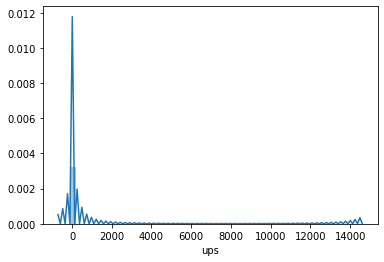

In [14]:
import seaborn as sns
sns.distplot(df['ups'])

In [19]:
df.loc[df.subreddit=='gameofthrones']

#See if you can select a subreddit when you get back. 

,body,id,downs,author,created_utc,subreddit,name,ups
446,"[All books](#b ""White Walkers and the Wights? ...",ca9tbow,0,GeeJo,1370044873,gameofthrones,t1_ca9tbow,5
545,Why is Winterfell the only location used? I wo...,ca9tbvn,0,iwiddlyscuds,1370044891,gameofthrones,t1_ca9tbvn,1
1364,I might actually cheer for them if they were p...,ca9tdd9,0,speedyjohn,1370045031,gameofthrones,t1_ca9tdd9,3
1566,Who's gonna sue?,ca9tdqu,0,speedyjohn,1370045066,gameofthrones,t1_ca9tdqu,1
2048,"[ALL books](#b ""I agree with you on everything...",ca9temy,0,accountNo7,1370045148,gameofthrones,t1_ca9temy,2
...,...,...,...,...,...,...,...,...
789144,"Yes, and he isn't even that pretty.",catg52s,0,heyboyhey,1372636573,gameofthrones,t1_catg52s,3
789165,Haha obviously.\n\nThough the women in GOT are...,catg546,0,Vrael22,1372636578,gameofthrones,t1_catg546,10
789283,"In addition, Dany was a 14 year old girl and s...",catg5cb,0,DatGrag,1372636599,gameofthrones,t1_catg5cb,2
789744,"""Even now I could cut through the five of you ...",catg670,0,TheAngryRobot,1372636675,gameofthrones,t1_catg670,2


In [28]:
df.loc[df.subreddit=='conspiracy'].author.value_counts()

moparornocar    434
Zenof           376
GarrioValere    361
no1113          324
streetyouth     284
               ... 
SALTYHIPPO        1
ccrepitation      1
Sbeast            1
loki_racer        1
VinceFish         1
Name: author, Length: 5124, dtype: int64

In [30]:
df.loc[df.author=='moparornocar'].subreddit.value_counts()

conspiracy              434
WTF                      76
funny                    37
pics                     36
AdviceAnimals            31
                       ... 
DIY                       1
facepalm                  1
MorbidReality             1
GameDeals                 1
firstworldanarchists      1
Name: subreddit, Length: 67, dtype: int64

The_Donald†, LateStageCapitalism†, Libertarian(?), socialism, anarcho_capitalism, progressive(?), chapotraphouse†, neoliberal(?), thenewright, goldandblack[1], sjwhate††, sjw_hate††, conspiracy, fuckthealtright, sjwhate††, sjw_hate††, monarchism


In [31]:
for c in ['The_Donald', 'LateStageCapitalism', 'Libertarian', 'socialism', 'anarcho_capitalism', 'progressive', 'chapotraphouse', 'neoliberal', 'thenewright', 'goldandblack', 'sjwhate', 'sjw_hate', 'conspiracy', 'fuckthealtright', 'sjwhate', 'sjw_hate'††, monarchism]:
    df.loc[df.subreddit=='LateStageCapitalism'].subreddit.value_counts()

Series([], Name: subreddit, dtype: int64)

In [33]:
df.subreddit.value_counts()

AskReddit        1633155
gaming            628202
funny             483354
pics              374106
AdviceAnimals     339505
                  ...   
lesbianhair            1
Fugazi                 1
Mullets                1
catsmeow               1
SamSleeping            1
Name: subreddit, Length: 22365, dtype: int64

In [39]:
df.subreddit.value_counts()[(df.subreddit.value_counts()>10**3)&(df.subreddit.value_counts()<10**5)]

trees                 96604
DotA2                 92864
movies                91090
soccer                88164
cringepics            83795
                      ...  
futurebeats            1011
askcarsales            1006
roguelikes             1004
Ebay                   1003
fifthworldproblems     1002
Name: subreddit, Length: 1183, dtype: int64

In [46]:
df.subreddit.value_counts()['objectivism']
#socialism works
#voluntarism has 1 post

KeyError: 'objectivism'

In [ ]:
#Example:   Grabbing only users that posted in gaming or funny:

(df.loc[(df.subreddit=='gaming')|(df.subreddit=='objectivism')])['author'].unique()

In [5]:
import csv
import bz2
import json
count=0
max_num_size=10**6

#changing to 8 to 9 and running again


unwanted_keys=['retrieved_on','parent_id','author_flair_text','score','author_flair_css_class',
               'controversiality','score_hidden','link_id','subreddit_id','edited','distinguished','gilded','archived','removal_reason']

full_keys=['body', 'id', 'downs', 'author_flair_css_class', 'controversiality',
       'score', 'link_id', 'distinguished', 'author', 'author_flair_text',
       'created_utc', 'subreddit', 'gilded', 'retrieved_on', 'archived',
       'parent_id', 'edited', 'score_hidden', 'name', 'subreddit_id', 'ups',
       'removal_reason']

fields=[k for k in full_keys if k not in unwanted_keys]


fieldnames=fields
file_name='RC_2017-09.bz2'
new_file_name='good_file_reddit_2017_09'

with bz2.open(file_name,mode='rb') as source_file:
    count=0
    num_written=0
    print(f'counting {count}')
           
    while num_written<max_num_size and count<100:
        with open(f'{new_file_name}_{count}.csv', 'w', newline='',encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames,extrasaction='ignore')
            writer.writeheader()       
            for x in source_file:
                newline=json.loads(source_file.readline())
                if newline['body']!='[deleted]' and (not (newline['author'] in ['[deleted]', 'conspirobot', 'ModerationLog', 'AutoModerator', 'qkme_transcriber','pixis-4950','JiffyBot'])):
                    writer.writerow(newline)
                    num_written+=1
                    if num_written%10**5==0:
                        print(num_written)
                if num_written>=max_num_size:
                    break
        count+=1
        num_written=0             
        print('>>>>>',count)
        

            
# I think this ends when you run out of file... I don't know how to do this "safely" though.  
# If that doesn't kill it, it should rapidly count to the limit I think, since the "for x in" will be bypassed each time.

# The error raised is --> 355             raise JSONDecodeError("Expecting value", s, err.value) from None
#Which makes me think that yeah, it's breaking because it's hit the end.  

#No, that's not the issue.  This time it ran all the way as I thought it would.  So I must have had courrpted entries in the other ones. 
#but I suppose it probably won't be a problem.  

#Something I didn't think about was that this still makes files 39 on, they're just empty.  I'm manually deleting those here but 
#I should figure out a way to handle that.  

#This has 81 million comments in it.  

announce_end()

#Name and ups didn't come in.  I'll have to figure out what's up with that.  I think just score will be present.  I could change that.  


counting 0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 1
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 2
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 3
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 4
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 5
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 6
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 7
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 8
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 9
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 10
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 11
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
>>>>> 12
100000
200000
300000
400000
500000
600

NameError: name 'announce_end' is not defined

# ohhhhhh, you can just do with ___ as ____, ____ as _____

In [ ]:
announce_end()

# At the very least subreddit might be better as "categorical" dtype. 

Be aware of the mechanisms by which new categories can be added, removed, or renamed.   This might be important for subreddits that only appear in one of my partial dfs, though I suppose they should generally be dropped.  

"Merging / concatenation¶
By default, combining Series or DataFrames which contain the same categories results in category dtype, otherwise results will depend on the dtype of the underlying categories. Merges that result in non-categorical dtypes will likely have higher memory usage. Use .astype or union_categoricals to ensure category results.

"

"Memory usage
The memory usage of a Categorical is proportional to the number of categories plus the length of the data. In contrast, an object dtype is a constant times the length of the data."

>In [237]: s = pd.Series(['foo', 'bar'] * 1000)

># object dtype
>In [238]: s.nbytes
>Out[238]: 16000

># category dtype
>In [239]: s.astype('category').nbytes
>Out[239]: 2016

> > If the number of categories approaches the length of the data, the Categorical will use nearly the same or more memory than an equivalent object dtype representation.

Be aware of categorical columns not being treated as numpy arrays

"dtype in apply
Pandas currently does not preserve the dtype in apply functions: If you apply along rows you get a Series of object dtype (same as getting a row -> getting one element will return a basic type) and applying along columns will also convert to object. NaN values are unaffected. You can use fillna to handle missing values before applying a function."

seems rough

> .iat vs iloc

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import pandas as pd

In [6]:
big_df=pd.concat([pd.read_csv(fr'big_dfs_saved\good_file_reddit_2017_08_{k}.csv') for k in range(2)])

In [21]:
big_df['subreddit']=big_df['subreddit'].astype('category')
big_df['author']=big_df['author'].astype('category')

In [38]:
(big_df['author'].value_counts())[(big_df['author'].value_counts())>1000]

grrrrreat          3652
ImagesOfNetwork    2398
BFair2Prez         1146
MovieGuide         1025
imguralbumbot      1020
BitcoinAllBot      1012
Name: author, dtype: int64

In [33]:
big_df.loc[big_df.author=='imguralbumbot']['body'].apply(print)
#You are getting some weird stuff, e.g. html codes.  

^(Hi, I'm a bot for linking direct images of albums with only 1 image)

https://i.imgur.com/Hwtwy6j.jpg

^^[Source](https://github.com/AUTplayed/imguralbumbot) ^^| ^^[Why?](https://github.com/AUTplayed/imguralbumbot/blob/master/README.md) ^^| ^^[Creator](https://np.reddit.com/user/AUTplayed/) ^^| ^^[state_of_imgur](https://np.reddit.com/r/u_imguralbumbot/comments/6i1huv/imgur_has_gone_to_shit) ^^| ^^[ignoreme](https://np.reddit.com/message/compose/?to=imguralbumbot&amp;subject=ignoreme&amp;message=ignoreme) ^^| ^^[deletthis](https://np.reddit.com/message/compose/?to=imguralbumbot&amp;subject=delet%20this&amp;message=delet%20this%20dkznn84) 
^(Hi, I'm a bot for linking direct images of albums with only 1 image)

https://i.imgur.com/nJMmt2L.png

^^[Source](https://github.com/AUTplayed/imguralbumbot) ^^| ^^[Why?](https://github.com/AUTplayed/imguralbumbot/blob/master/README.md) ^^| ^^[Creator](https://np.reddit.com/user/AUTplayed/) ^^| ^^[state_of_imgur](https://np.reddit.com/r/u_imguralb

^^[Source](https://github.com/AUTplayed/imguralbumbot) ^^| ^^[Why?](https://github.com/AUTplayed/imguralbumbot/blob/master/README.md) ^^| ^^[Creator](https://np.reddit.com/user/AUTplayed/) ^^| ^^[ignoreme](https://np.reddit.com/message/compose/?to=imguralbumbot&amp;subject=ignoreme&amp;message=ignoreme) ^^| ^^[deletthis](https://np.reddit.com/message/compose/?to=imguralbumbot&amp;subject=delet%20this&amp;message=delet%20this%20dl2138d) 
^(Hi, I'm a bot for linking direct images of albums with only 1 image)

https://i.imgur.com/pxfZU7j.jpg

^^[Source](https://github.com/AUTplayed/imguralbumbot) ^^| ^^[Why?](https://github.com/AUTplayed/imguralbumbot/blob/master/README.md) ^^| ^^[Creator](https://np.reddit.com/user/AUTplayed/) ^^| ^^[ignoreme](https://np.reddit.com/message/compose/?to=imguralbumbot&amp;subject=ignoreme&amp;message=ignoreme) ^^| ^^[deletthis](https://np.reddit.com/message/compose/?to=imguralbumbot&amp;subject=delet%20this&amp;message=delet%20this%20dl2157k) 
^(Hi, I'm a b

6463      None
7070      None
11271     None
18281     None
20399     None
          ... 
990342    None
991108    None
995351    None
998875    None
999808    None
Name: body, Length: 1020, dtype: object

More bots: 
ImagesOfNetwork
MovieGuide
imguralbot   
>you definitely *could* filter by author names that end in bot or users that seem to just post the same thing over and over. 

BitcoinAllBot

Here's a list of bots:  https://www.reddit.com/r/autowikibot/wiki/redditbots
https://www.reddit.com/r/Kangashark/comments/kbt55/automated_accounts/



In [39]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column       Dtype   
---  ------       -----   
 0   body         object  
 1   id           object  
 2   downs        float64 
 3   author       category
 4   created_utc  int64   
 5   subreddit    category
 6   name         float64 
 7   ups          float64 
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 144.2+ MB


In [40]:
big_df.describe()

,downs,created_utc,name,ups
count,0.0,2.000000e+06,0.0,0.0
mean,NaN,1.501616e+09,NaN,NaN
std,NaN,3.922301e+04,NaN,NaN
min,NaN,1.501546e+09,NaN,NaN
25%,NaN,1.501589e+09,NaN,NaN
50%,NaN,1.501616e+09,NaN,NaN
75%,NaN,1.501644e+09,NaN,NaN
max,NaN,1.501687e+09,NaN,NaN


In [41]:
big_df.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [42]:
big_df.isna().sum()

body                42
id                   0
downs          2000000
author               0
created_utc          0
subreddit            0
name           2000000
ups            2000000
dtype: int64

In [43]:
big_df.loc[big_df['body'].isna()]

,body,id,downs,author,created_utc,subreddit,name,ups
110205,NaN,dkzsj26,NaN,RedBluewind,1501552065,todayilearned,NaN,NaN
138062,NaN,dkztubu,NaN,therasque,1501553735,PUBATTLEGROUNDS,NaN,NaN
163011,NaN,dkzv0we,NaN,Bosticles,1501555321,iamverybadass,NaN,NaN
237154,NaN,dkzyis0,NaN,DarkGuyZ007,1501560461,leagueoflegends,NaN,NaN
249395,NaN,dkzz3p5,NaN,psyfry,1501561405,legaladvice,NaN,NaN
267173,NaN,dkzzxxa,NaN,DybalaMert,1501562834,FUTMobile,NaN,NaN
388278,NaN,dl05o6p,NaN,admiralsakazuki,1501575327,politics,NaN,NaN
419759,NaN,dl075tu,NaN,kRkthOr,1501579495,totallynotrobots,NaN,NaN
459840,NaN,dl0921t,NaN,Horitius,1501584560,FFBraveExvius,NaN,NaN
488420,NaN,dl0aeqz,NaN,O_Bonito,1501587576,portugal,NaN,NaN


In [46]:
the_donald=big_df.loc[big_df.subreddit=='The_Donald']
print(the_donald.shape)
print(the_donald.author.nunique())

(24854, 8)
7559


# So I can create a big list of users with at least ten posts in a political subreddit???, then 

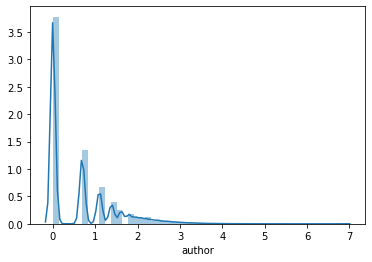

In [51]:
import seaborn as sns
import numpy as np
sns.distplot((big_df.author.value_counts()[big_df.author.value_counts()<1000]).apply(np.log))

I can drop any user that shows up less than 5 times period per frame. 

In [53]:
(big_df.author.value_counts()[(big_df.author.value_counts()>5)&(big_df.author.value_counts()<1000)])

RPBot                929
WikiTextBot          868
ChefTatertot         714
DemonBurritoCat      693
kdiuro13             641
                    ... 
LolliManLetsPlays      6
WarnerHS               6
Skardee                6
orangesheepdog         6
LQ9823                 6
Name: author, Length: 78390, dtype: int64

In [56]:
#Seeing number of posts by bot(?)s:
big_df.author.apply(lambda s: "BOT" if s[-3:].lower()=='bot' else "NOBOT").value_counts(normalize=True)

NOBOT    0.991926
BOT      0.008074
Name: author, dtype: float64

In [60]:
((big_df.author)[big_df.author.apply(lambda s: s[-3:].lower()!='bot')]).value_counts()

grrrrreat          3652
ImagesOfNetwork    2398
BFair2Prez         1146
MovieGuide         1025
ChefTatertot        714
                   ... 
350Bot                0
RemindMeBot           0
IamPirateRobot        0
Daggerbot             0
TrollaBot             0
Name: author, Length: 668807, dtype: int64

In [58]:
big_df.author.apply(lambda s: s[-3:].lower()=='bot')

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Name: author, Length: 2000000, dtype: object

In [65]:
big_df['body'].apply(lambda s: s.lower() if type(s)==str else print(s))

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


0         http://www.pixiv.net/member_illust.php?mode=me...
1         i'm not arguing that making university free an...
2                   served in the chair force. can confirm 
3         i still stand by it not belonging on the plate...
4                                 bulldong out - ktolguy in
                                ...                        
999995    he had a pretty strong knock because he is in ...
999996    i love me some kenny britt in the late rounds....
999997    so the justification for making newbies feel m...
999998    do you have pics/timestamps? regardless i dont...
999999    i've been blocked from a couple btc services f...
Name: body, Length: 2000000, dtype: object

Pick a random user, grab 50 posts from them:  WIth a bigger data set, can grab more.  Can reset if don't grab enough?  

Groupby is very memory intensive I believe.  

In [98]:
chapo_users=big_df.loc[big_df['subreddit']=='ChapoTrapHouse']['author']

#Grab just the chapo user.  In a mature form, instead use .isin and the list of fringe groups and can be iteratred, using
#.isin and/or .sample below


chosen_user=chapo_users.value_counts()[chapo_users.value_counts(dropna=False)>=10].sample().index[0]

#Grab a random user that appears more than 10 times

example_user=big_df.loc[big_df.author==chosen_user,['author','body','subreddit']]
#Grab bodies by the given user

display(example_user)
 
 #I don't understand why there's 0 for some users in the value_counts.  How can that be?  

#I'm not sure how to handle users that appear in only the target subreddit.  I suppose in the MVP that'll be okay???

#Oh, it's becaues I'm using the categories from the main group.  I guess... just deal with it if it's not too big? 
#just the names alone shouldn't be too big and I'm looking for a max anyway

,author,body,subreddit
435066,lakelly99,it's actually why games get fucking released ever,Games
497030,lakelly99,C,ChapoTrapHouse
501818,lakelly99,it's a little different when they're releasing...,Games
502615,lakelly99,this is violence,ChapoTrapHouse
646622,lakelly99,B O R D I G A,ChapoTrapHouse
671345,lakelly99,"Ah yes, because socialism is actually when the...",ChapoTrapHouse
881100,lakelly99,[this is a good start] (https://libcom.org/lib...,ChapoTrapHouse
9890,lakelly99,probably neither if we're being totally seriou...,ChapoTrapHouse
274347,lakelly99,"i'm dense, what do you mean by that",ChapoTrapHouse
286166,lakelly99,lmao nice\n\n,ChapoTrapHouse


Sampling 10 random users:

In [102]:
chosen_users=chapo_users.value_counts()[chapo_users.value_counts(dropna=False)>=10].sample(10).index.to_list()

#Grab 10 random users that appears more than 10 times

example_users=big_df.loc[big_df.author.isin(chosen_users),['author','body','subreddit']]
#Grab bodies by the given user

display(example_users)

example_users.subreddit.value_counts()
#Something to be aware of is that many users don't post outside of their subreddit, at least for this one.  But
#I think that might be okay.  

 

,author,body,subreddit
1586,DessaB,A perfect Swasdicka!,ChapoTrapHouse
19159,BitterAsianMan,We used to be black. Then the Spaniards happen...,ChapoTrapHouse
27020,BitterAsianMan,Daddy James Cromwell and Daddy Devito you fuck...,ChapoTrapHouse
30254,justplayKOF13,Is there a part 2 on Venezuela uploaded?,ChapoTrapHouse
35728,BitterAsianMan,Barring the left finding a truly charismatic f...,ChapoTrapHouse
...,...,...,...
963764,DessaB,[Announcer:] Next week on U62... \n[Announc...,ChapoTrapHouse
965083,Kiss_Me_Im_A_Liberal,&gt;We should return to a more Greek concept o...,ChapoTrapHouse
968203,emizeko,makin' a play. looks like big pharma has decid...,ChapoTrapHouse
969426,DessaB,That's too much power for one man. Last time ...,ChapoTrapHouse


ChapoTrapHouse           150
programmingcirclejerk      9
Eyebleach                  2
badwomensanatomy           2
beholdthemasterrace        1
                        ... 
elca                       0
elderscrollslegends        0
elderscrollsonline         0
eldertrees                 0
093game                    0
Name: subreddit, Length: 22554, dtype: int64

Sampling 10 random non-users (using not isin here just to show that'll work)

In [115]:
non_chapo_users=big_df.loc[~ big_df['subreddit'].isin(['ChapoTrapHouse','5253523justafake_subreddit'])]['author']

# ~ for "not" in numpy/pandas

chosen_non_users=non_chapo_users.value_counts()[non_chapo_users.value_counts(dropna=False)>=10].sample(10).index.to_list()

#Grab 10 random users that appears more than 10 times

example_non_users=big_df.loc[big_df.author.isin(chosen_non_users),['author','body','subreddit']]
#Grab bodies by the given user

display(example_non_users)

display(example_non_users.subreddit.value_counts())
#Something to be aware of is that many users don't post outside of their subreddit, at least for this one.  But
#I think that might be okay.  

(example_non_users.author.cat.remove_unused_categories()).value_counts()

#Example with resetting unused categories
                           

,author,body,subreddit
2266,already_satisfied,P,AskOuija
2613,already_satisfied,S,AskOuija
4667,already_satisfied,E,AskOuija
5024,already_satisfied,O,AskOuija
7765,already_satisfied,B,AskOuija
...,...,...,...
922185,Neetz512,Before throwaway cell phones became a thing dr...,IDontWorkHereLady
923502,burntfishnchips,&gt; No T No shade but I havnt watched season ...,rupaulsdragrace
935535,Neetz512,I don't think there's actually qualifications ...,mildlyinteresting
953176,pizzywoah,When did you sign up for your last AA card? T...,churning


AskReddit          35
AskOuija           26
australia          23
rupaulsdragrace    17
churning           15
                   ..
eintracht           0
ejuice              0
ekkomains           0
elasticsearch       0
093game             0
Name: subreddit, Length: 22554, dtype: int64

already_satisfied    30
Neetz512             29
viking_pancakes      23
burntfishnchips      17
pizzywoah            15
assh0les97           14
Eldaxar              14
AmbientBananas       13
TheDezoo             12
MsLoveShacker        11
Name: author, dtype: int64

In [117]:
big_df.body.value_counts().head(100)

Thanks!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1071
Yes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    797
Thank you!        

In [127]:
example_non_users

,author,body,subreddit
2266,already_satisfied,P,AskOuija
2613,already_satisfied,S,AskOuija
4667,already_satisfied,E,AskOuija
5024,already_satisfied,O,AskOuija
7765,already_satisfied,B,AskOuija
...,...,...,...
922185,Neetz512,Before throwaway cell phones became a thing dr...,IDontWorkHereLady
923502,burntfishnchips,&gt; No T No shade but I havnt watched season ...,rupaulsdragrace
935535,Neetz512,I don't think there's actually qualifications ...,mildlyinteresting
953176,pizzywoah,When did you sign up for your last AA card? T...,churning


In [139]:
example_non_users.author.cat.remove_unused_categories()

2266      already_satisfied
2613      already_satisfied
4667      already_satisfied
5024      already_satisfied
7765      already_satisfied
                ...        
922185             Neetz512
923502      burntfishnchips
935535             Neetz512
953176            pizzywoah
954500      burntfishnchips
Name: author, Length: 178, dtype: category
Categories (10, object): [AmbientBananas, Eldaxar, MsLoveShacker, Neetz512, ..., assh0les97, burntfishnchips, pizzywoah, viking_pancakes]

It's going to be not-uncommon to have to workaround in a bunch of weird ways when using these categorical series.  
But it may well be worth it.  

In [148]:
example_non_users_workaround=example_non_users.copy()
example_non_users_workaround['author'].cat.remove_unused_categories(inplace=True)
example_non_users_workaround['subreddit'].cat.remove_unused_categories(inplace=True)

example_non_users_workaround.groupby('author').subreddit.value_counts()

author             subreddit            
AmbientBananas     AskReddit                12
                   Jokes                     1
Eldaxar            Warframe                 14
MsLoveShacker      COMPLETEANARCHY           6
                   ANI_COMMUNISM             4
                   Kaiserreich               1
Neetz512           AskReddit                21
                   mildlyinteresting         4
                   IDontWorkHereLady         2
                   TalesFromTheFrontDesk     2
TheDezoo           LoserleavesReddit        12
already_satisfied  AskOuija                 26
                   AskReddit                 2
                   HunterXHunter             1
                   JusticeServed             1
assh0les97         hiphopheads               8
                   popheads                  2
                   13ReasonsWhy              1
                   lanadelrey                1
                   music_survivor            1
                   

# Grabbing another month.  Changing a couple of the columns (ups, downs, name are out and scores are in) and passing in some more known bad users.  

In [ ]:
print('safeguarded')
raise Exception

import csv
import bz2
import json
count=0
max_num_size=10**6

#changing to 8 to 9 and running again


unwanted_keys=['retrieved_on','parent_id','author_flair_text','score','author_flair_css_class','ups','downs'
               'controversiality','score_hidden','link_id','subreddit_id','edited','distinguished','gilded','archived','removal_reason']

full_keys=['body', 'id', 'downs', 'author_flair_css_class', 'controversiality',
       'score', 'link_id', 'distinguished', 'author', 'author_flair_text',
       'created_utc', 'subreddit', 'gilded', 'retrieved_on', 'archived',
       'parent_id', 'edited', 'score_hidden', 'name', 'subreddit_id', 'ups',
       'removal_reason']

fields=[k for k in full_keys if k not in unwanted_keys]


fieldnames=fields
file_name='RC_2017-09.bz2'
new_file_name='good_file_reddit_2017_09'

bad_users=['[deleted]', 'conspirobot', 'ModerationLog', 'AutoModerator', 'qkme_transcriber','pixis-4950','JiffyBot','ImagesOfNetwork',
           'MovieGuide'',imguralbot','BitcoinAllBot']


with bz2.open(file_name,mode='rb') as source_file:
    count=0
    num_written=0
    print(f'counting {count}')
           
    while num_written<max_num_size and count<100:
        with open(f'{new_file_name}_{count}.csv', 'w', newline='',encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames,extrasaction='ignore')
            writer.writeheader()       
            for x in source_file:
                newline=json.loads(source_file.readline())
                if newline['body']!='[deleted]' and (not (newline['author'] in bad_users)):
                    writer.writerow(newline)
                    num_written+=1
                    if num_written%10**5==0:
                        print(num_written)
                if num_written>=max_num_size:
                    break
        count+=1
        num_written=0             
        print('>>>>>',count)
        

            
# I think this ends when you run out of file... I don't know how to do this "safely" though.  
# If that doesn't kill it, it should rapidly count to the limit I think, since the "for x in" will be bypassed each time.

# The error raised is --> 355             raise JSONDecodeError("Expecting value", s, err.value) from None
#Which makes me think that yeah, it's breaking because it's hit the end.  

#No, that's not the issue.  This time it ran all the way as I thought it would.  So I must have had courrpted entries in the other ones. 
#but I suppose it probably won't be a problem.  

#Something I didn't think about was that this still makes files 39 on, they're just empty.  I'm manually deleting those here but 
#I should figure out a way to handle that.  

#This has 81 million comments in it.  

announce_end()

#Name and ups didn't come in.  I'll have to figure out what's up with that.  I think just score will be present.  I could change that.  


In [3]:
pwd

'C:\\Users\\shawj'

# Another shot at a sqlite database
using https://datatofish.com/create-database-python-using-sqlite3/


The basic outline given below works. 

In [4]:
print('safeguarded')
raise Exception

#Dummy construction
import sqlite3
import pandas as pd
conn_dummy=sqlite3.connect('dummy_database.db')
c_dummy=conn_dummy.cursor()

c_dummy.execute('''
CREATE TABLE DUMMY_TABLE ([generated_id], INTEGER PRIMARY KEY, [subreddit] text, [body] text, [author] text)
''')


#Making the dummy, only two posts from one month
for r in range(2):
    try:
        read_df=pd.read_csv(fr'big_dfs_saved\good_file_reddit_2017_08_{r}.csv',usecols=['subreddit','body','author'])
        read_df.to_sql('POSTS',conn_dummy,if_exists='append',index=False) #append for looping
        print(f'08 {r}')
    except:
        print(f'failed at r={r}')


08 0
08 1


In [11]:
print('safeguarded')
raise Exception

#sTEP 1:  Create new database
import sqlite3
import pandas as pd

conn=sqlite3.connect('test_database.db')
c=conn.cursor()

c.execute('''
CREATE TABLE TEST_TABLE ([generated_id], INTEGER PRIMARY KEY, [subreddit] text, [body] text, [author] text)
''')

conn.commit()

In [31]:
print('safeguarded')
raise Exception

import sqlite3
import pandas as pd

conn=sqlite3.connect('test_database.db')
c=conn.cursor()

read_df=pd.read_csv(r'safe_example_datasets\chunked_df_0constrained.csv',usecols=['subreddit','body','author'])
read_df.to_sql('COUNTRY',conn,if_exists='replace',index=False)

# c.execute('''INSERT INTO TEST_TABLE (subreddit,body,author)''')


In [32]:
print('safeguarded')
raise Exception

c.execute('''
SELECT body FROM COUNTRY WHERE subreddit='nba'
''').fetchall()

[('This will fuel conspiracy theorists.  "Hurrrr they fouled out James in 4, didn\'t throw birdman out in 5 and now they suspended him in 6 cuz they want the pacers to push it to seven games hurrrrr-deeeee-hurrrrrr"',)]

In [2]:
print('safeguarded')
raise Exception

import sqlite3
import pandas as pd


conn=sqlite3.connect('big_dfs_saved_08_09_2017_database.db')
c=conn.cursor()

c.execute('''
CREATE TABLE POSTS ([generated_id], INTEGER PRIMARY KEY, [subreddit] text, [body] text, [author] text)
''')

conn.commit()

print('table made')

conn=sqlite3.connect('big_dfs_saved_08_09_2017_database.db')
c=conn.cursor()
#If you run into problems, the first thing to try should be the garbage collection trick you found earlier
for r in range(39):
    try:
        read_df=pd.read_csv(fr'big_dfs_saved\good_file_reddit_2017_08_{r}.csv',usecols=['subreddit','body','author'])
        read_df.to_sql('POSTS',conn,if_exists='append',index=False) #append for looping
        print('08 {r}')
    except:
        print(f'failed at r={r}')
for r in range(39):
    try:
        read_df=pd.read_csv(fr'big_dfs_saved\good_file_reddit_2017_09_{r}.csv',usecols=['subreddit','body','author'])
        read_df.to_sql('POSTS',conn,if_exists='append',index=False) #append for looping 
        print('09 {r}')
    except:
        print(f'failed at r={r}')

# c.execute('''INSERT INTO TEST_TABLE (subreddit,body,author)''')
#forgot to make the rs part of an f-string, ah well.  

table made
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
08 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
09 {r}
failed at r=37
09 {r}


There is no 37 for some weird reason
"In this case, remember that append is an expensive operation for data frames and it is preferable to create a long list of your dataframes and then execute concat once. A great discussion of this is here."

"You can cast columns into a paricular datatype during the csv read by passing in a dictionary of {colname: dtype}, or you can process the dataframe chunks after the read with the astype method:"

will have to check how to use that with multiple categories across csvs.  I believe this is discussed in the docs thoguh.  

https://sdsawtelle.github.io/blog/output/large-data-files-pandas-sqlite.html

the suggestion to use sklearn's label encoder on, say, the subreddits or more usefully the usernames is intriguing.  

The article also helps support my idea, CONTRA THE HATERS, that a sql database *is* how I should be doing this.   I can use it to have a massive database of mostly stuff I don't want and only put the stuff I do into a dataframe.  

the new index thing is also appealing.  

In [2]:
import sqlite3
import pandas as pd

conn=sqlite3.connect('test_database.db')
c=conn.cursor()

ModuleNotFoundError: No module named 'pandas'

In [6]:
c.execute('''

SELECT body FROM POSTS WHERE subreddit='anarcho_primitivism' OR subreddit='nrx'

''').fetchall()




[('^^^\nThis guy went into r/anarchafeminism and made a post entitled "Kill all men amirite?"\n\nLOL What a loser.\n\nGo away.',),
 ('**Here\'s a sneak peek of /r/anarchafeminism using the [top posts](https://np.reddit.com/r/anarchafeminism/top/?sort=top&amp;t=year) of the year!**\n\n\\#1: [Death to Patriarchy!](https://68.media.tumblr.com/05e66a693f00bacfa1d34ad7fde62118/tumblr_omyqp8vfqb1uk5x82o1_1280.jpg) | [4 comments](https://np.reddit.com/r/anarchafeminism/comments/646rsw/death_to_patriarchy/)  \n\\#2: [Richard Spencer says he doesn\'t want to "become the meme to end all memes." Let\'s make sure it fucking happens comrades!](https://np.reddit.com/r/anarchafeminism/comments/5pnx6n/richard_spencer_says_he_doesnt_want_to_become_the/)  \n\\#3: ["How Nonviolence Protects the State" by Peter Gelderloos, Chapter 4 Nonviolence is Patriarchal](https://www.youtube.com/watch?v=3W-UrmIio94&amp;t=11s) | [1 comment](https://np.reddit.com/r/anarchafeminism/comments/6gyo7k/how_nonviolence_protec

https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

In [11]:
df.nunique()

body           1942262
id             2000000
downs                1
author          492549
created_utc     395000
subreddit        11475
name           2000000
ups               1849
dtype: int64

In [10]:
%who_ls

['df', 'pd']

In [2]:
import pandas as pd
test_df=pd.read_sql('''

SELECT author,subreddit,body FROM POSTS WHERE subreddit='anarcho_primitivism' OR subreddit='nrx' LIMIT 1000

''', conn           
           )
announce_end()

NameError: name 'conn' is not defined

In [ ]:
display(test_df)
test_df_backup=test_df.copy()

Capturing differences in vernacular would be nice, hence the desire to not stem/lemmatize, but for processing ability I probably should.  Ditto for punctuation, or at least some.  I would like to harvest websites though. 

In [30]:
import numpy as np
test_df['linking texts']=test_df.body.apply(lambda s: s if (('http' in s) or ('www' in s)) else np.nan)#Will learn how to do this better at some point

#I know I can use regex to more successfully split all this. 
test_df[]

Removing stop words should, of course, happen.  Use TF-IDF Vectorization on per-user corpus?   Then maybe cut off indicators that are too powerful (overitting, for instance words that appear in only one corpus)

Tokenize doesn't play well with apostraphes, interesting.  I'll try lemmatizing before I try to work around that. 

In [32]:
from nltk.tokenize import word_tokenize
test_df['body']=test_df['body'].apply(lambda s: s.lower())
test_df['body'].apply(lambda s: word_tokenize(s))

0      [^^^, this, guy, went, into, r/anarchafeminism...
1      [**here, 's, a, sneak, peek, of, /r/anarchafem...
2      [do, you, have, any, idea, why, they, were, so...
3      [domestication, is, a, result, of, selective, ...
4      [because, changing, things, at, the, genetic, ...
                             ...                        
129    [honestly, as, a, person, who, 's, survival, d...
130    [i, 'm, disabled, and, trans, and, i, basicall...
131    [i, 'm, trying, (, against, my, better, judgme...
132    [if, i, believe, it, to, be, true, ?, you, did...
133    [i, 'd, like, a, good, reason, -, not, -, to, ...
Name: body, Length: 134, dtype: object

`
    def term_frequency(BoW_dict):
    TF_dict={key:(BoW_dict[key]/sum(list(BoW_dict.values()))) for key in BoW_dict.keys()}
    return TF_dict
    

    test = term_frequency(test_vectorized)
    print(test)
    print(list(test)[10:20])
`


`
    def inverse_document_frequency(list_of_dicts):
    
    words_to_count=set(sum([list(s.keys()) for s in list_of_dicts],[]))
    num_docs=len(list_of_dicts)

    IDF_dict={word:len([g for g in list_of_dicts if word in g.keys()]) for word in words_to_count}
    print(IDF_dict)
`




`
def tf_idf(list_of_dicts):
    idf=inverse_document_frequency(list_of_dicts)
    all_words=idf.keys()
    return_list=[]
    for entry in list_of_dicts:
        tf=term_frequency(test_vectorized)
        return_list.append({tf.get(key,0)*idf[key] for key in all_words})
    return return_list
    `
    
    
`
def main(filenames):
    list_of_songs=[]
    for name in filenames:
        with open(name) as file:
            song=file.read()
        song=clean_song(song)
        song=tokenize(song)
        
        song=count_vectorize(song)
        list_of_songs.append(song)
    return tf_idf(list_of_songs)
`


\_t-Stochastic Neighbors Embedding_)

TSNE is worth trying to understand and maybe use?

In [36]:
test_df['body']

0      ^^^\nThis guy went into r/anarchafeminism and ...
1      **Here's a sneak peek of /r/anarchafeminism us...
2      Do you have any idea why they were so rude to ...
3      Domestication is a result of selective breedin...
4      Because changing things at the genetic level i...
                             ...                        
129    honestly as a person who's survival demands ac...
130    I'm disabled and trans and I basically "need" ...
131    I'm trying (against my better judgment) to eng...
132    if I believe it to be true ? You didnt deny th...
133    I'd like a good reason - NOT - to think that i...
Name: body, Length: 134, dtype: object

In [51]:
#example subreddit linkings:
import re
p=re.compile('/r/[a-zA-Z0-9-]*')
sum([s for s in (test_df['body'].apply(lambda s: p.findall(s))).to_list() if len(s)>0],[])

['/r/anarchafeminism',
 '/r/anarchafeminism',
 '/r/anarchafeminism',
 '/r/anarchafeminism',
 '/r/anarchafeminism',
 '/r/sneakpeekbot',
 '/r/sneakpeekbot',
 '/r/HelperBot',
 '/r/anarchism',
 '/r/anarchotranshumanist',
 '/r/anarchotranshumanist',
 '/r/anarchotranshumanist',
 '/r/anarchotranshumanist',
 '/r/anarchotranshumanist',
 '/r/sneakpeekbot',
 '/r/sneakpeekbot',
 '/r/ChapoTrapHouse',
 '/r/ChapoTrapHouse',
 '/r/girlsgonewiredRedux',
 '/r/girlsgonewiredRedux',
 '/r/DuplicatesBot',
 '/r/DuplicatesBot',
 '/r/DuplicatesBot',
 '/r/DuplicatesBot']

In [65]:
# stopwords
from nltk.corpus import stopwords
import string


stopwords_list=stopwords.words('english')
# stopwords_list += list(string.punctuation)

#Don't want to start dropping punctuation until I take care of websites or anything else that might come up.  At least,
#I'd probably??? like to treat communities as distinct from other words.  


#I will drop all punctuation that isn't website-ish or subredditish:
stopwords_list+=[p for p in string.punctuation if (not (p in ['/',':','.']))]
#Can use more sophisticated regexing later I'm sure
test_tokens=test_df['body'].apply(lambda s: [w.lower() for w in word_tokenize(s) if w not in stopwords_list])

#lemmatizing I assume handles the apostrophe problem.  Letting a lot of errors pass through here as I'm doing 
#this along side the learn.co material. 

In [64]:
word_tokenize('^^^')

['^^^']

In [70]:
from nltk import FreqDist
freqdist=FreqDist(
    sum(test_tokens.to_list(),[])
)

most_common=freqdist.most_common(200)
print(most_common)

[('.', 398), ('i', 186), ("'s", 90), ("n't", 77), (':', 55), ('like', 45), ('people', 41), ('https', 35), ("'m", 32), ('``', 30), ("''", 29), ('think', 28), ('way', 26), ('it', 26), ("'re", 25), ('nature', 24), ('life', 24), ('the', 23), ('that', 21), ('much', 19), ('live', 18), ('us', 18), ('also', 18), ('one', 17), ('even', 17), ('food', 16), ('know', 16), ('would', 16), ('this', 15), ('things', 15), ('something', 15), ('humans', 15), ('animals', 15), ('want', 14), ('world', 14), ('gt', 14), ('but', 14), ('...', 14), ('good', 14), ('earth', 14), ('living', 13), ('there', 13), ('if', 13), ('^^|', 12), ('problem', 12), ('many', 12), ('said', 12), ('may', 12), ('civilization', 12), ('always', 12), ('genetic', 11), ('going', 11), ('without', 11), ('really', 11), ('say', 11), ('mean', 11), ('species', 11), ('well', 11), ("'d", 11), ('ca', 11), ('believe', 11), ('what', 10), ('agriculture', 10), ('so', 10), ('enough', 10), ("'ve", 10), ('get', 10), ('bad', 10), ('not', 10), ('better', 10),

In [85]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
test_tokens.apply(lambda s: [lemmatizer.lemmatize(w) for w in s])

#The lemmatizer doesn't reduce "running" for me????

0      [^^^, this, guy, went, r/anarchafeminism, made...
1      [**here, 's, sneak, peek, /r/anarchafeminism, ...
2      [do, idea, rude, claimed, problem, changing, t...
3      [domestication, result, selective, breeding, t...
4      [because, changing, thing, genetic, level, com...
                             ...                        
129    [honestly, person, 's, survival, demand, acces...
130    [i, 'm, disabled, trans, i, basically, ``, nee...
131    [i, 'm, trying, better, judgment, engage, good...
132    [i, believe, true, you, didnt, deny, part, bil...
133    [i, 'd, like, good, reason, not, think, got, one]
Name: body, Length: 134, dtype: object

In [91]:
print(lemmatizer.lemmatize('running'))
print(lemmatizer.lemmatize('ran'))
print(lemmatizer.lemmatize('running'))
print(lemmatizer.lemmatize('run'))
print(lemmatizer.lemmatize('feet'))

running
ran
running
run
foot


In [98]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer2 = WordNetLemmatizer()

print(lemmatizer2.lemmatize('feet')) # foot
print(lemmatizer2.lemmatize('running') )
print(lemmatizer2.lemmatize('disabled'))
print(lemmatizer2.lemmatize("bats"))

#"This can be corrected if we provide the correct ‘part-of-speech’ tag (POS tag) as the second argument to lemmatize()."

foot
running
disabled
bat


https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#:~:text=TreeTagger-,2.,and%20most%20commonly%20used%20lemmatizers.

So I can try porter-stemmer, snowball stemmer, lemmatize solo, and lemmatize-with-POS tagging

There's also this "spaCy lemmatization" thing and a bunch of other up there. 

Can try a few different n-gram lengths. learn.co mentions using this to filter by-chance bigrams, and then mentions use of the Pointwise Mutual Information Score. 

CFG/POS tagging may well do worse than just stemming, due to the nature of writing on the internet (presumably you'll very often have atypical sentence structures). 

Andy mentions not really using lematization.  

sklearn's countvectorizer will by default lowercase things  It takes in otpions for token_pattern, stop_words, tokenizer, etc.  

Look at independence for finding samples / assembling entries

For bigrams, include stop-words.  Keep that in mind when doing pipelining.    


Rationale for exclusion being good enough:   If they're large enough to be concerned about, they're large enough to be named (but still manually spot-checking).  




TF-IDF with k-nearest neighbors????


You use TF-IDF vs CountVectorizer and just see what you get.  


Andy says he doesn't find cosine similarity to be that useful

 nltk synsets

In [1]:
import sqlite3
import pandas as pd
conn=sqlite3.connect('test_database.db')
c=conn.cursor()



In [22]:
subredditlinks=c.execute('''
SELECT * FROM POSTS WHERE body LIKE "%/r/%"
''').fetchall()

In [26]:
subredditlinks_df=pd.DataFrame(subredditlinks,columns=['body','author','subreddit'])
subredditlinks_df
#removing subreddits that talk about themselves
#Apparently all subreddits look like /r/(textcharacters or underscores, no leading underscores)
subredditlinks_df

,body,author,subreddit
0,"&gt;[He loved being a celebrity, not a CEO. He...",IllKissYourBoobies,AskTrumpSupporters
1,**Converted Taobao Links:**\n\n[WTC Link](http...,TaobaoTools,RepLadies
2,Other videos in this thread: [Watch Playlist &...,Mentioned_Videos,videos
3,"This content brought to you from ""Images of Ro...",ImagesOfNetwork,ImagesOfromania
4,[EarthFans](https://www.reddit.com/r/EarthFans...,RPBot,NoSillySuffix
...,...,...,...
546905,Fixed it and shared it again:\nhttps://www.red...,firesofmay,ethtrader
546906,[Really?](https://www.reddit.com/r/Brawlstars/...,alekli,Brawlstars
546907,https://www.reddit.com/r/politics/comments/6va...,herpderpimCy,AdviceAnimals
546908,TIL in /r/frugal/ you can be downvoted for bei...,agent_of_entropy,Frugal


In [55]:
#Find subreddits linked to within post.  Keeping the /r/ for now
import re
def find_sublink(s):
    return set(re.findall("/r/[A-Za-z]\w+",s))

#Dropping duplicates


# Giving this a shot on the full two-month df
(subredditlinks_df['body'].map(find_sublink))

edge_list=


#Stack exchange says I should be using a map on a series, not an apply.  It was an older thread though, perhaps
#optimization has addressed some of that.  

0          {/r/AskTrumpSupporters}
1                 {/r/FashionReps}
2         {/r/videos, /r/SubtleTV}
3             {/r/imagesofnetwork}
4                   {/r/EarthFans}
                    ...           
546905              {/r/ethtrader}
546906             {/r/Brawlstars}
546907               {/r/politics}
546908                 {/r/frugal}
546909                {/r/Paragon}
Name: body, Length: 546910, dtype: object

In [50]:
find_sublink('/r/this_is_atest_sub____')

['/r/this_is_atest_sub____']

In [56]:
subredditlinks_df['body'].apply(find_sublink)

0          {/r/AskTrumpSupporters}
1                 {/r/FashionReps}
2         {/r/videos, /r/SubtleTV}
3             {/r/imagesofnetwork}
4                   {/r/EarthFans}
                    ...           
546905              {/r/ethtrader}
546906             {/r/Brawlstars}
546907               {/r/politics}
546908                 {/r/frugal}
546909                {/r/Paragon}
Name: body, Length: 546910, dtype: object